In [37]:
%reload_ext autoreload
%autoreload 2

# Team ZALIX Milestone 2

# TODO PROJECT DESCRIPTION AND ANASYS



# Data Import and Data Preprocessing

In [38]:
# imports
import os
import ast
import math
import json
import requests
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import ipywidgets as widgets

import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


from scipy import stats
from datetime import datetime as dt
from ipywidgets import interact, interactive, fixed, interact_manual

from IPython.display import HTML
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [39]:
import helpers

# Data Loading , the imprt_movies_data function load and preprocess the data
movies,characters = helpers.import_movies_data("./data/")

movies.shape

/Users/antoineschutz/Documents/GitHub/ada-2023-project-zalix/helpers.py:73: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  movies["year_released"] = pd.to_datetime(


(14369, 13)

# XIYU's part TODO DEL

# Genres
- Within the 10 most common film genres, which genre and/or combination of genres were the most appreciated and high-rated during each decade ? 
- Did any particular genre stand out and could be symbolizing a historical turning point ?

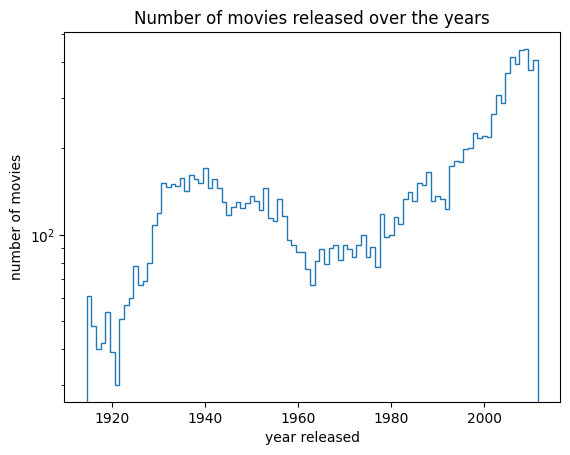

In [40]:
# plot the distribution of release years
bins = np.arange(1915, 2013) - 0.5  # -0.5 for center-aligned bins
plt.hist(movies["year_released"], histtype="step", bins=bins, log=True)
plt.title("Number of movies released over the years")
plt.xlabel("year released")
plt.ylabel("number of movies")
plt.show()

(784,)
 "/m/07s9rl0": "Drama"                    3486
 "/m/01z4y": "Comedy"                     1999
{"/m/01jfsb": "Thriller"                  1566
 "/m/01z4y": "Comedy"}                    1387
 "/m/01g6gs": "Black-and-white"}          1348
                                          ... 
{"/m/03jp5h0": "Archaeology"                 1
 "/m/0fx2s": "Tragedy"}                      1
{"/m/0hj3n11": "Environmental Science"       1
{"/m/01lrrt": "Melodrama"}                   1
{"/m/01lmb_": "Sword and Sandal"             1
Name: count, Length: 784, dtype: int64


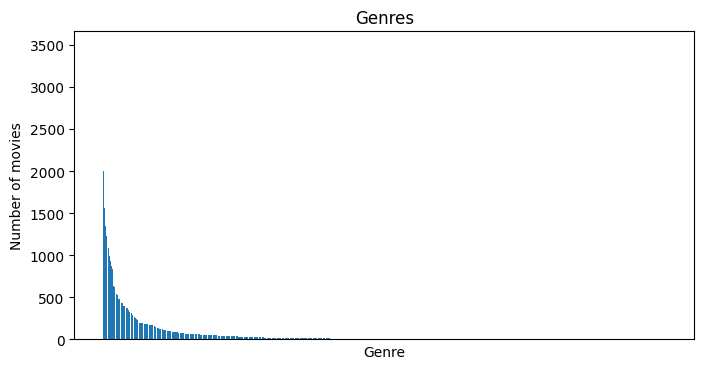

In [41]:
#genres
genres = movies["movie_genres"].str.split(",", expand=True).stack().value_counts()
print(genres.shape)
print(genres)
#plot genres
plt.figure(figsize=(8, 4))
plt.bar(genres.index, genres.values)
#hide x labels
plt.xticks([])
#plt.xticks(rotation=90)
plt.title("Genres")
plt.xlabel("Genre")
plt.ylabel("Number of movies")
plt.show()


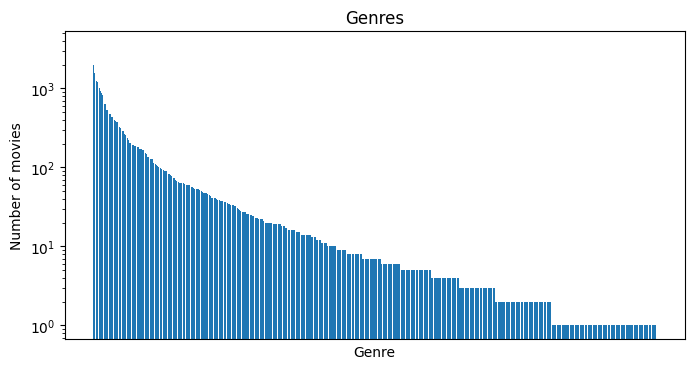

In [42]:
#use log scaling to do the above plot again
plt.figure(figsize=(8, 4))
plt.bar(genres.index, genres.values)
plt.xticks([])
#plt.xticks(rotation=90)
plt.title("Genres")
plt.xlabel("Genre")
plt.ylabel("Number of movies")
plt.yscale("log")
plt.show()


In [43]:
#extract the main genre
def extract_genres(row):
    try:
        genres_dict = json.loads(row)
        return list(genres_dict.values()) if genres_dict else ['NaN']
    except json.JSONDecodeError:
        return ['NaN']

# Apply the function to create a new 'genre' column
movies['genre'] = movies['movie_genres'].apply(extract_genres)
genre=movies['genre'].explode().copy()
genre=genre[genre!='NaN']
genre=genre.value_counts()
#find the unique genres
unique_genres = genre.index
print(unique_genres)

Index(['Drama', 'Comedy', 'Black-and-white', 'Romance Film', 'Thriller',
       'Action', 'Crime Fiction', 'Short Film', 'Indie', 'Adventure',
       ...
       'Historical Documentaries', 'Race movie', 'Science fiction Western',
       'Kitchen sink realism', 'Filipino', 'Sci-Fi Thriller',
       'Political Documetary', 'Nuclear warfare', 'Space opera',
       'Revisionist Fairy Tale'],
      dtype='object', name='genre', length=323)


In [44]:
# give the top 10 genres that has the largerst number of movies and store them in genre_main
genre_main = genre[:10]
print(genre_main.shape)
print(genre_main.index)

(10,)
Index(['Drama', 'Comedy', 'Black-and-white', 'Romance Film', 'Thriller',
       'Action', 'Crime Fiction', 'Short Film', 'Indie', 'Adventure'],
      dtype='object', name='genre')


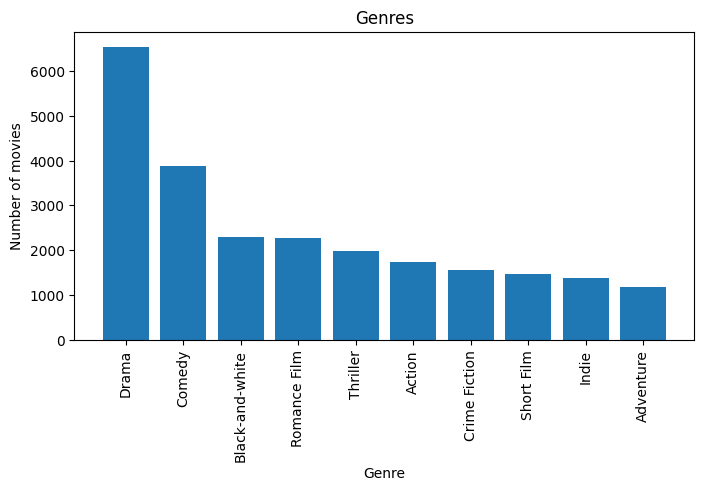

In [45]:
#plot the top 10 genres
plt.figure(figsize=(8, 4))
plt.bar(genre_main.index, genre_main.values)
plt.xticks(rotation=90)
plt.title("Genres")
plt.xlabel("Genre")
plt.ylabel("Number of movies")
plt.show()

In [46]:
#filter the movies that have the genres in genre_main, not necessarily the first genre
movies_main = movies[movies['genre'].apply(lambda x: any(item for item in x if item in genre_main.index))].copy()
print(movies_main.shape)
movies_main.head()


(12463, 14)


,wikipedia_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year_released,tconst,averageRating,numVotes,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,tt0228333,4.9,56928.0,"[Thriller, Science Fiction, Horror, Adventure,..."
2,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,tt0002894,6.8,17.0,"[Short Film, Silent film, Indie, Black-and-whi..."
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938,tt0029852,6.8,2268.0,"[Musical, Comedy, Black-and-white]"
5,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989,tt0097499,7.5,31208.0,"[Costume drama, War film, Epic, Period piece, ..."
6,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964,tt0058331,7.8,181829.0,"[Children's/Family, Musical, Fantasy, Comedy, ..."


(10,)
Index(['Drama', 'Comedy', 'Black-and-white', 'Romance Film', 'Thriller',
       'Action', 'Crime Fiction', 'Short Film', 'Indie', 'Adventure'],
      dtype='object', name='genre')


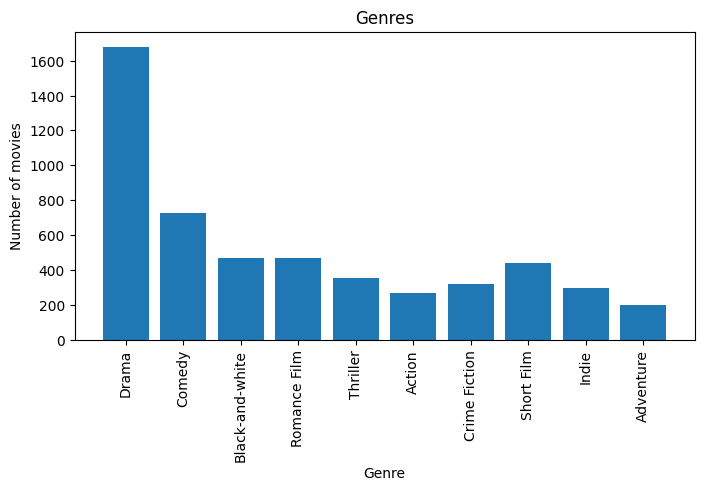

In [47]:
#filter the movies with rating higher than 7 from the movies_main dataset
movies_main_filtered= movies_main[movies_main['averageRating']>=7].copy()
#for each genre in genre_main, find the number of movies in movies_main_filter that have the genre
#and plot the number of movies for each genre
genre_main_filtered = movies_main_filtered['genre'].explode().value_counts()[genre_main.index]
print(genre_main_filtered.shape)
print(genre_main_filtered.index)
plt.figure(figsize=(8, 4))
plt.bar(genre_main_filtered.index, genre_main_filtered.values)
plt.xticks(rotation=90)
plt.title("Genres")
plt.xlabel("Genre")
plt.ylabel("Number of movies")
plt.show()

From the graph we could see that Drama has more high rating movies, but this is mostly due to the large base number of genre movies.
Therefore we will further consider the ratio between the number of high rating movies and the number of total movies with the same genre, which we define as success_rate.

(10, 2)


/var/folders/9_/z1m27wy57j34pk1k36dtbd280000gn/T/ipykernel_8601/1735292041.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  genre_ratio = pd.concat([genre_ratio, pd.DataFrame({'genre': [g], 'ratio': [ratio]})], ignore_index=True)#sort the dataframe by ratio


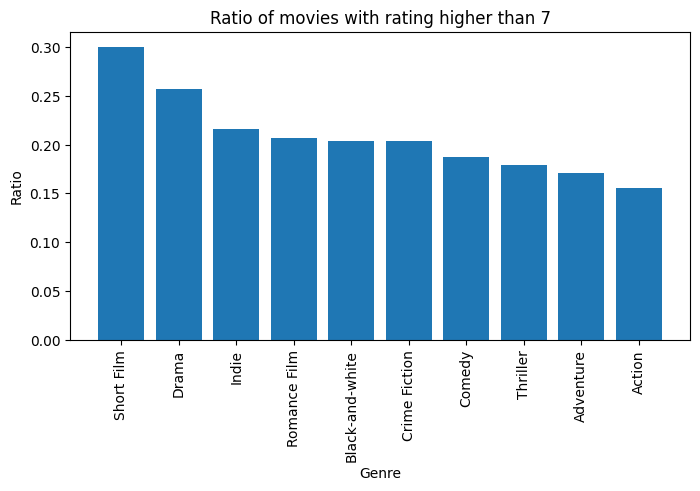

In [48]:
#for each genre, calculate the ratio of movies with rating higher than 7 / total number of movies in that genre
genre_ratio = pd.DataFrame(columns=['genre', 'ratio'])
for g in genre_main.index:
    ratio = len(movies_main_filtered[movies_main_filtered['genre'].apply(lambda x: g in x)]) / len(movies_main[movies_main['genre'].apply(lambda x: g in x)])
    #add the genre and ratio to the dataframe
    genre_ratio = pd.concat([genre_ratio, pd.DataFrame({'genre': [g], 'ratio': [ratio]})], ignore_index=True)#sort the dataframe by ratio
genre_ratio = genre_ratio.sort_values(by='ratio', ascending=False)
print(genre_ratio.shape)
#plot the ratio
plt.figure(figsize=(8, 4))
plt.bar(genre_ratio['genre'], genre_ratio['ratio'])
plt.xticks(rotation=90)
plt.title("Ratio of movies with rating higher than 7")
plt.xlabel("Genre")
plt.ylabel("Ratio")
plt.show()


In [50]:
#create a new dataframe with only the top 10 genres and has a rating larger than 7
movies_main = movies[movies["averageRating"] >= 7].copy()
movies_main = movies_main.drop(columns=["movie_genres", "genre"])
movies_main = movies_main.reset_index(drop=True)
print(movies_main.shape)
movies_main.head()


(3247, 12)


,wikipedia_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,year_released,tconst,averageRating,numVotes
0,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}",1989,tt0097499,7.5,31208.0
1,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",1964,tt0058331,7.8,181829.0
2,24399617,/m/07s63_7,Bruce Lee: The Lost Interview,1994-11-02,NaN,30.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0d060g"": ""Canada""}",1994,tt0432762,8.6,123.0
3,8669450,/m/027d9tv,One Six Right,2005-11-25,NaN,73.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",2005,tt0475994,7.9,457.0
4,164388,/m/015wmt,The Great Santini,1979-10-26,4702575.0,115.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",1979,tt0079239,7.2,6812.0


# Runtime
- Are there any trends or patterns in the distribution of durations for top-rated films over the years and is there a significant difference in the distribution of durations between different genres among top-rated films?

In [51]:
#duration
#the distribution of runtime and its correlation with rating
print(movies[["movie_runtime", "averageRating"]].count())
duration = movies[["movie_runtime", "averageRating"]].dropna()
duration.count()

movie_runtime    13609
averageRating    14369
dtype: int64


movie_runtime    13609
averageRating    13609
dtype: int64

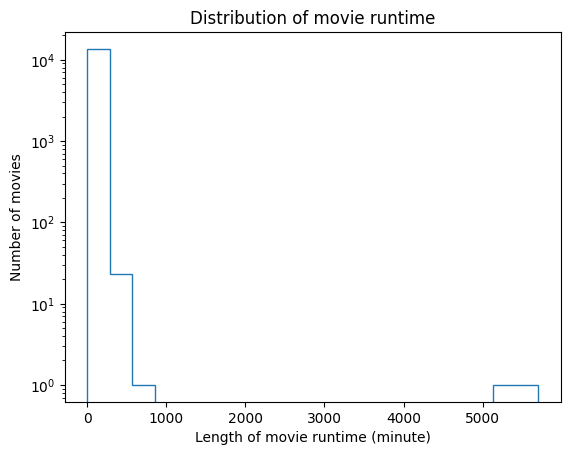

In [52]:
# histogram plot without removing outliers
plt.hist(duration["movie_runtime"], histtype="step", log=True, bins=20)
plt.title("Distribution of movie runtime")
plt.xlabel("Length of movie runtime (minute)")
plt.ylabel("Number of movies")
plt.show()


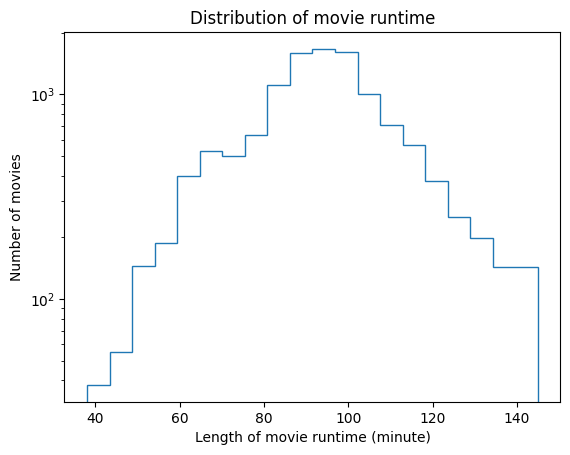

In [53]:
# histogram plot with removing outliers using IQR
q1 = duration["movie_runtime"].quantile(0.25)
q3 = duration["movie_runtime"].quantile(0.75)
iqr = q3 - q1
duration = duration[duration["movie_runtime"] < q3 + 1.5 * iqr]
duration = duration[duration["movie_runtime"] > q1 - 1.5 * iqr]

plt.hist(duration["movie_runtime"], histtype="step", log=True, bins=20)
plt.title("Distribution of movie runtime")
plt.xlabel("Length of movie runtime (minute)")
plt.ylabel("Number of movies")
plt.show()


                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     374.7
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           3.26e-82
Time:                        16:26:53   Log-Likelihood:                -16873.
No. Observations:               11874   AIC:                         3.375e+04
Df Residuals:                   11872   BIC:                         3.376e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.2557      0.047    110.670

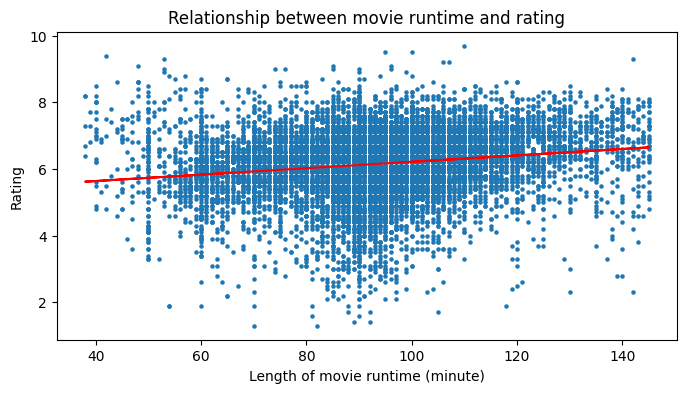

In [54]:
#perform linear regression on duration data, and plot the regression line
model=smf.ols(formula='averageRating ~ movie_runtime', data=duration)
results=model.fit()
print(results.summary())
#plot the regression line
plt.figure(figsize=(8, 4))
plt.scatter(duration["movie_runtime"], duration["averageRating"], s=5)
plt.plot(duration["movie_runtime"], results.predict(), color="red")
plt.title("Relationship between movie runtime and rating")
plt.xlabel("Length of movie runtime (minute)")
plt.ylabel("Rating")
plt.show()


# ZACH's PART TODO DELETE

# Diversity
-This section explores the relationship between the ethnic make-up of a movie's cast and its ratings 

### Research question 1: how has actors' ethnic demographics changed over the years in the global movies industry? 

(375,)


<Axes: >

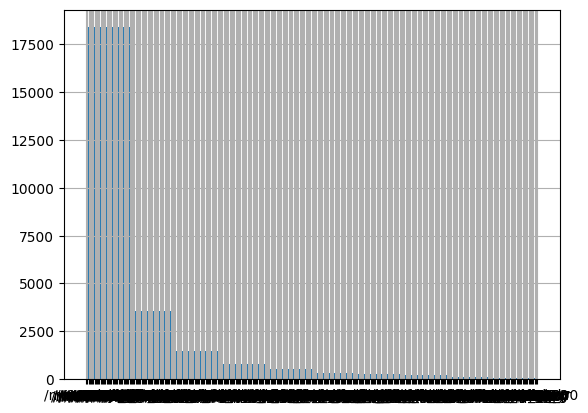

In [55]:
## data preprocessing
# NOTE: INNER join movies with characters (ignore if either side's info is missing)
movies_ratings_characters = pd.merge(movies, characters, how='inner', on=['wikipedia_movie_ID'])
movies_ratings_characters.head(3)

## exploratory data analysis
# show distribution of ethnicities
ethnicity_count = movies_ratings_characters['actor_ethnicity'].value_counts()
print(ethnicity_count.shape)
# half ethnicities have frequency < 10
# print(ethnicity_count.values)

movies_ratings_characters['actor_ethnicity'].hist()

In [56]:
## compute the number of actor ethnicities in each decade
# add decade column
movies_ratings_characters['decade'] = movies_ratings_characters['year_released'].apply(lambda x: int(x/10)*10)
# compute the number of ethnicities for each decade based on actors who have at least one film released in that decade
# NOTE: missing values in ethnicity column are ignored
decade_ethnicity = pd.crosstab(movies_ratings_characters['decade'], movies_ratings_characters['actor_ethnicity'])
decade_num_ethnicities = decade_ethnicity.apply(lambda x: (x != 0).sum(), axis=1)

# NOTE: last decade's drop expla
# ined by data collected till 2013 
display(decade_num_ethnicities)

decade
1900      1
1910     12
1920     27
1930     39
1940     55
1950     72
1960     80
1970    126
1980    174
1990    239
2000    312
2010    227
dtype: int64

<Axes: xlabel='decade'>

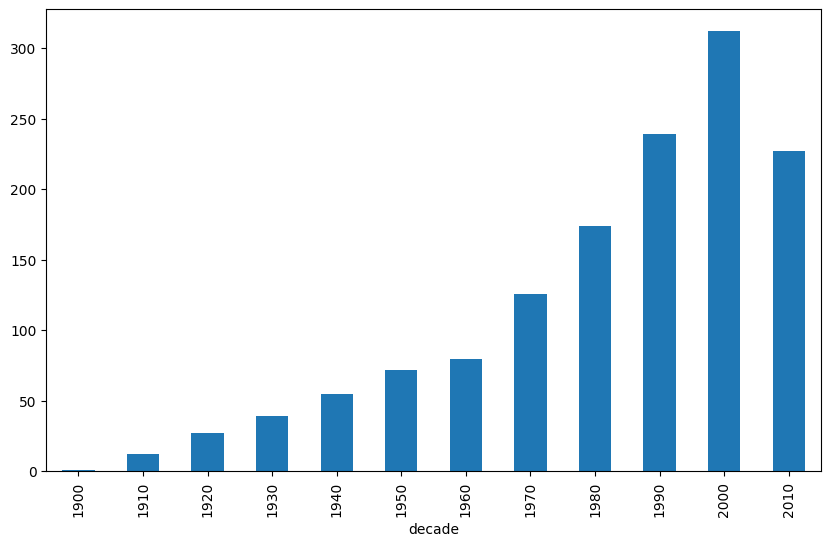

In [57]:
# plot the number of actor ethnicities in each decade
decade_num_ethnicities.plot.bar(stacked=True, figsize=(10, 6))
# answers research question 1: in the global movie industry, actors are coming from increasingly more diverse ethnic backgrounds over the years

### Research question 2: is the global film industry producing more ethnically diverse good films over the years?

(12574, 27)
count    12574.000000
mean         6.152505
std          1.032984
min          1.300000
25%          5.600000
50%          6.300000
75%          6.800000
max          9.900000
Name: averageRating, dtype: float64
(2644, 27) 0.2102751709877525


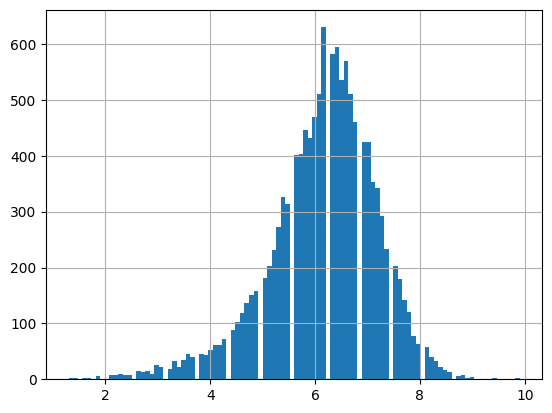

In [58]:
## exploratory data analysis 
# filter dataset to unique movies
# NOTE: number of movies (with ratings) shrank from 14369 to 12574 after joining with characters
df_unique_movies = movies_ratings_characters.drop_duplicates(subset=['wikipedia_movie_ID'])
print(df_unique_movies.shape)

# show distribution of movie ratings
print(df_unique_movies['averageRating'].describe())
# roughly normally distributed
df_unique_movies['averageRating'].hist(bins=100)

high_ratings_movies = df_unique_movies[df_unique_movies['averageRating'] >= 7.0]
# 21.03% are high-rating films
print(high_ratings_movies.shape, high_ratings_movies.shape[0]/df_unique_movies.shape[0])

# NOTE: hereafter define good films as films with IMDB rating >= 7.0

In [59]:
# calculate number of ethnicities per film
movie_num_ethnicities = movies_ratings_characters.groupby('wikipedia_movie_ID')['actor_ethnicity'].nunique()

# show distribution of number of ethnicities per film


# NOTE: ethnically diverse films = number of different ethnicities in cast member >= 3

In [60]:
#TODO COMPLETE ZACH'S PART HERE


# Antoine's part

# Actors
- This section investigate the impact of the cast on Movie ratings
- It will also look at the evolution of ratings for actors

## Data Preprocessing 

In [61]:
print(movies.isna().sum())

print(characters.isna().sum())

wikipedia_movie_ID              0
freebase_movie_ID               0
movie_name                      0
movie_release_date              0
movie_box_office_revenue    11289
movie_runtime                 760
movie_languages                 0
movie_countries                 0
movie_genres                    0
year_released                   0
tconst                          0
averageRating                   0
numVotes                        0
genre                           0
dtype: int64
wikipedia_movie_ID                      0
freebase_movie_ID                       0
last_update                          9995
character_name                     257875
actor_DOB                          106145
actor_gender                        45609
actor_height                       295845
actor_ethnicity                    344611
actor_name                           1228
actor_age_at_movie_release         158113
freebase_character/actor_map_ID         0
freebase_character_ID              257865
freebas

We need actors to be identifiable , so we have to drop rows without freebase_actor_ID  

In [62]:
characters = characters[characters["freebase_actor_ID"].notna()]


In [63]:
Movies_characters_merge = pd.merge(movies,characters,on=["wikipedia_movie_ID", "freebase_movie_ID"])


Movies_characters_merge.head(5)



,wikipedia_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year_released,...,character_name,actor_DOB,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_character/actor_map_ID,freebase_character_ID,freebase_actor_ID
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,...,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,...,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,...,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,...,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,...,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


Now , we need to make sure that an actor appears only once in a Movie

In [64]:
dup = Movies_characters_merge[Movies_characters_merge.duplicated(subset=["wikipedia_movie_ID","freebase_actor_ID"],keep=False)]
dup.head(5)

,wikipedia_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year_released,...,character_name,actor_DOB,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_character/actor_map_ID,freebase_character_ID,freebase_actor_ID
45,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964,...,Bert,1925-12-13,M,1.85,/m/07mqps,Dick Van Dyke,38.0,/m/0k0gyy,/m/05gkznp,/m/01vb403
47,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964,...,Mr. Dawes Senior,1925-12-13,M,1.85,/m/07mqps,Dick Van Dyke,38.0,/m/0h12l69,/m/0h12l6c,/m/01vb403
534,6004372,/m/0fk60h,Grace of My Heart,1996-09-08,617632.0,116.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/09glv8x"": ""Film \u00e0 clef"", ""/m/04xvlr""...",1996,...,Denise Waverly,1965-07-25,F,1.74,NaN,Illeana Douglas,31.0,/m/0jyzlg,/m/0h5m7zm,/m/01pg1d
535,6004372,/m/0fk60h,Grace of My Heart,1996-09-08,617632.0,116.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/09glv8x"": ""Film \u00e0 clef"", ""/m/04xvlr""...",1996,...,Edna Buxton,1965-07-25,F,1.74,NaN,Illeana Douglas,31.0,/m/0hmzb_v,/m/0hmzb_y,/m/01pg1d
735,20694087,/m/051w_vb,Kanden Kadhalai,2009-10-30,NaN,NaN,"{""/m/07c9s"": ""Tamil Language""}","{""/m/03rk0"": ""India""}","{""/m/02l7c8"": ""Romance Film"", ""/m/01z4y"": ""Com...",2009,...,Mayil Vaganam,1953-06-04,M,NaN,/m/0dryh9k,Manobala,56.0,/m/0hb4c_j,/m/0hb4czd,/m/06zmg7m


Exemple : In the movie Mary poppins the actor Dick Van Dyke plays Bert and Mr. Dawes Senior	

In [65]:
Movies_characters_merge = Movies_characters_merge.drop_duplicates(subset=["wikipedia_movie_ID","freebase_actor_ID"])
print("We have",Movies_characters_merge.shape[0],"Combinations of Movies+actor")

We have 105389 Combinations of Movies+actor


In [66]:
unique_movies = len(Movies_characters_merge["freebase_movie_ID"].unique())
unique_actors = len(Movies_characters_merge["freebase_actor_ID"].unique())


print("There are",unique_movies,"unique movies and",unique_actors,"unique actors")



There are 12570 unique movies and 46250 unique actors


### Numbers of Actors in movies , and Number of Movies played by actors

count    46250.000000
mean         2.278681
std          3.261078
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        100.000000
Name: Number_of_Movies, dtype: float64
1.0


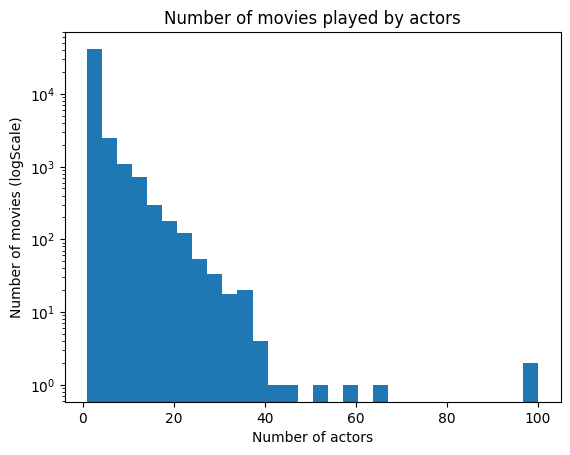

In [67]:
import matplotlib.pyplot as plt

actor_movies_count = Movies_characters_merge.groupby("freebase_actor_ID")["freebase_movie_ID"].nunique().reset_index()
actor_movies_count.columns = ['Actor_id', 'Number_of_Movies']



print(actor_movies_count['Number_of_Movies'].describe())

print(actor_movies_count['Number_of_Movies'].quantile(0.65))


plt.hist(actor_movies_count['Number_of_Movies'],bins=30,log=True)
plt.title("Number of movies played by actors")
plt.xlabel("Number of actors")
plt.ylabel("Number of movies (logScale)")
plt.show()

### Comment

We can see that most actors in the dataset played in only 1 Movies.

In order to do our analysis , we need to keep actors that played in multiple Movies.

count    12570.000000
mean         8.384169
std          6.080858
min          1.000000
25%          3.000000
50%          8.000000
75%         12.000000
max        115.000000
Name: Number_of_actors, dtype: float64


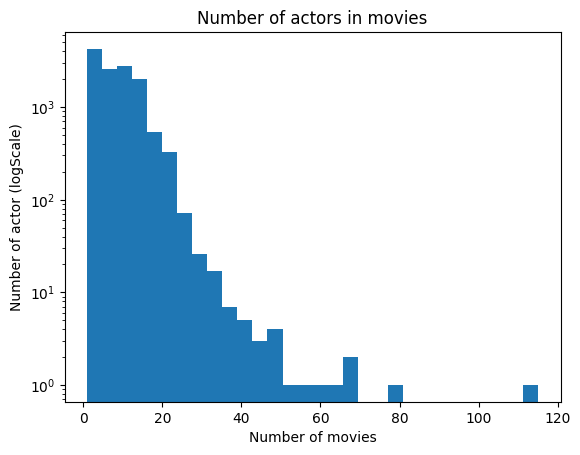

In [68]:
movies_actor_count = Movies_characters_merge.groupby("freebase_movie_ID")["freebase_actor_ID"].nunique().reset_index()
movies_actor_count.columns = ['Movies_id', 'Number_of_actors']



print(movies_actor_count['Number_of_actors'].describe())




plt.hist(movies_actor_count['Number_of_actors'],bins=30,log=True)
plt.title("Number of actors in movies")
plt.xlabel("Number of movies")
plt.ylabel("Number of actor (logScale)")
plt.show()

### Comment

We see that there are 8 actors on average on a Movie.

# Filtering Actors with Not enough Films

In [69]:
actors_with_at_least_10_movies = actor_movies_count[actor_movies_count.Number_of_Movies>10]
actors_with_at_least_20_movies = actor_movies_count[actor_movies_count.Number_of_Movies>20]



print("There are ",actors_with_at_least_10_movies.shape[0],"actors with at least 10 films, and ",actors_with_at_least_20_movies.shape[0],"actors with at least 20 films")



Movies_characters_merge_10movies = Movies_characters_merge[Movies_characters_merge["freebase_actor_ID"].isin(actors_with_at_least_10_movies.Actor_id.values)]
Movies_characters_merge_20movies = Movies_characters_merge[Movies_characters_merge["freebase_actor_ID"].isin(actors_with_at_least_20_movies.Actor_id.values)]




#Sanity check : 
unique_actors_10 = len(Movies_characters_merge_10movies["freebase_actor_ID"].unique())
unique_actors_20 = len(Movies_characters_merge_20movies["freebase_actor_ID"].unique())
unique_actors_10,unique_actors_20

There are  1450 actors with at least 10 films, and  260 actors with at least 20 films


(1450, 260)

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     11.05
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           0.000890
Time:                        16:26:56   Log-Likelihood:                -9012.7
No. Observations:                7014   AIC:                         1.803e+04
Df Residuals:                    7012   BIC:                         1.804e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.7147      0.705     12.369

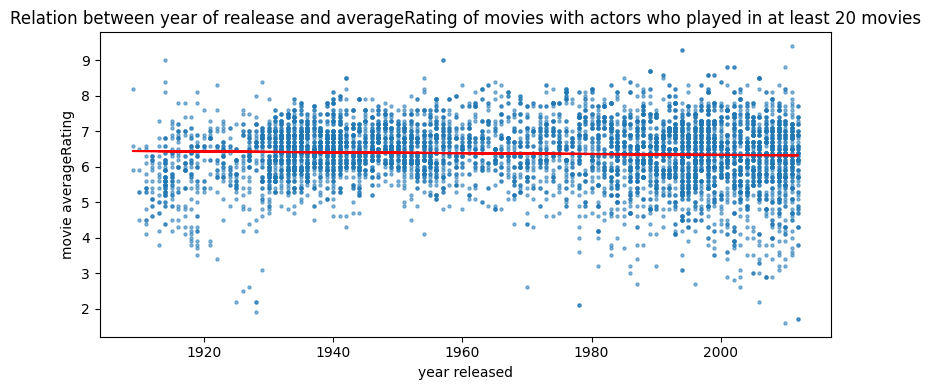

In [70]:
#perform linear regression on duration data, and plot the regression line
model=smf.ols(formula='averageRating ~ year_released', data=Movies_characters_merge_20movies)
results=model.fit()
print(results.summary())

plt.figure(figsize=(8, 4))
plt.scatter(Movies_characters_merge_20movies["year_released"], Movies_characters_merge_20movies["averageRating"], alpha=0.5, s=5)

plt.plot(Movies_characters_merge_20movies["year_released"], results.predict(), color="red")
plt.title("Relation between year of realease and averageRating of movies with actors who played in at least 20 movies")
plt.xlabel("year released")
plt.ylabel("movie averageRating")

plt.tight_layout()


plt.show()

# Visualisation of the Evolution of ratings for 5 random actors

In [71]:
import random


actorsId_20movies = Movies_characters_merge_20movies["freebase_actor_ID"].tolist() #List all actors that played in at least 20 movies
selected_actors = random.sample(actorsId_20movies, k=5) #Select 5 actors out of that list


Movies_characters_selected = Movies_characters_merge_20movies[Movies_characters_merge_20movies["freebase_actor_ID"].isin(selected_actors)] #


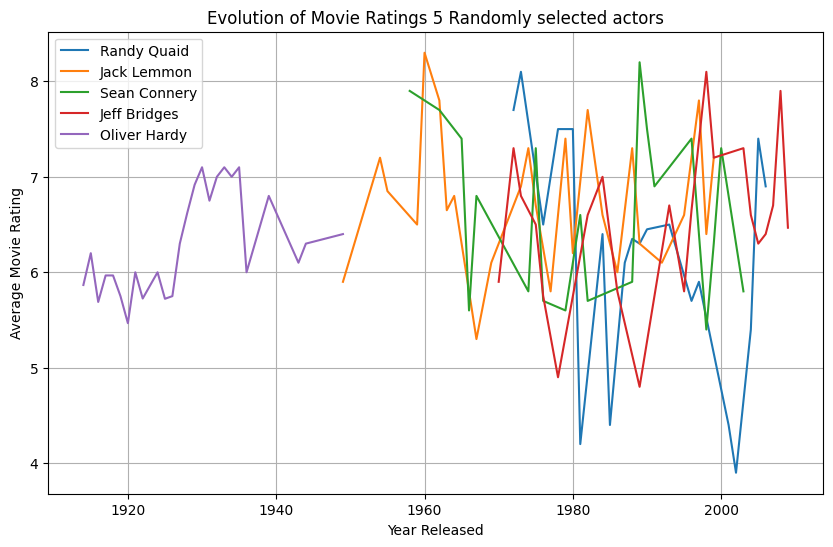

In [72]:
average_ratings_by_actor_year = Movies_characters_selected.groupby(['freebase_actor_ID','actor_name', 'year_released'])['averageRating'].mean().reset_index()

# Plotting the evolution of movie ratings across the years for all actors
plt.figure(figsize=(10, 6))

# Iterate through each actor, calculate their ratings over the years, and plot
for actor_id, actor_group in average_ratings_by_actor_year.groupby(['freebase_actor_ID',"actor_name"]):
    plt.plot(actor_group['year_released'], actor_group['averageRating'], label=actor_id[1])

# Set plot labels and title
plt.xlabel('Year Released')
plt.ylabel('Average Movie Rating')
plt.title('Evolution of Movie Ratings 5 Randomly selected actors')
plt.legend()  # Show legend with actor IDs

# Show the plot
plt.grid(True)
plt.show()

## Relation between year of realease and averageRating for actors with at least 20 movies

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.006
Date:                Fri, 17 Nov 2023   Prob (F-statistic):             0.0842
Time:                        16:26:57   Log-Likelihood:                -63.412
No. Observations:                 260   AIC:                             130.8
Df Residuals:                     258   BIC:                             137.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.85

Text(0, 0.5, 'movie averageRating')

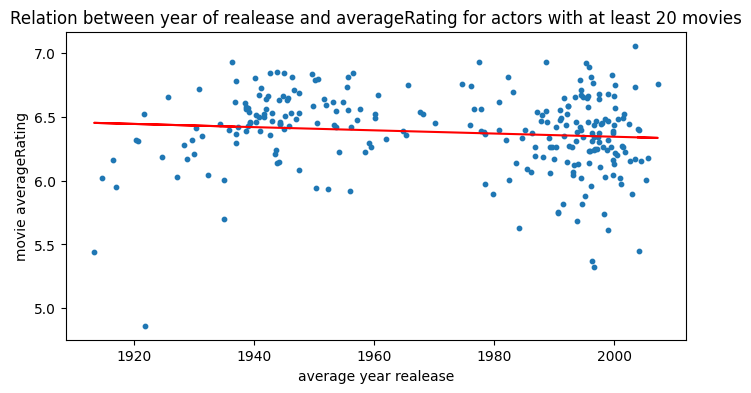

In [73]:
best_actors = Movies_characters_merge_20movies.groupby(["freebase_actor_ID","actor_name"]).agg({
    'averageRating': 'mean',
    'year_released': 'mean'
}).reset_index()

best_actors.sort_values(by="averageRating",ascending=False)

best_actors.columns=["freebase_actor_ID","actor_name","averageRating","average_year_realease"]

model=smf.ols(formula='averageRating ~ average_year_realease', data=best_actors)
results=model.fit()
print(results.summary())

plt.figure(figsize=(8, 4))
plt.scatter(best_actors["average_year_realease"], best_actors["averageRating"],s=10)

plt.plot(best_actors["average_year_realease"], results.predict(), color="red")
plt.title("Relation between year of realease and averageRating for actors with at least 20 movies")
plt.xlabel("average year realease")
plt.ylabel("movie averageRating")